# Times series

### Definition and caracteristics
A Time Series is a set of observations that are collected after regular intervals of time. This data is called time-dependent data. Given time-dependent data, **you can analyze the past to predict the future**. The future prediction will also include time as a variable, and the output will vary with time. Using time-dependent data, you can find patterns that repeat over time.

|Different Components of Time Series Analysis|
|:-:|
|![First Image](biblio/time_series_pres.jpg)|

1. Trend: The Trend shows the variation of data with time or the frequency of data. Using a Trend, you can see how your data increases or decreases over time. The data can increase, decrease, or remain stable. Over time, population, stock market fluctuations, and production in a company are all examples of trends.

2. Seasonality: Seasonality is used to find the variations which occur at regular intervals of time. Examples are festivals, conventions, seasons, etc. These variations usually happen around the same time period and affect the data in specific ways which you can predict. 

3. rregularity: Fluctuations in the time series data do not correspond to the trend or seasonality. These variations in your time series are purely random and usually caused by unforeseeable circumstances, such as a sudden decrease in population because of a natural calamity.

4. Cyclic: Oscillations in time series which last for more than a year are called cyclic. They may or may not be periodic. 

### Stationary
A time series that has the same statistical properties over time is stationary. The properties remain the same anywhere in the series. Your data needs to be stationary to perform time-series analysis on it. A stationary series has a constant mean, variance, and covariance. In other words, if it doesn’t increase or decrease with time linearly or exponentially(no trends), and if it doesn’t show any kind of repeating patterns(no seasonality)

### Causality
Causality is related to the phenomenon of causation: if one time series can be used to predict another time series, then those two are said to have some causal relation
(the patterns in X are approximately repeated in Y after some time lag)

## Analysis and description

- To test the stationarity od the data set : 

1. add rolling statistics (like moving average) to the data with a fixed window size to check for stationarity
2. statistical tests to identify this, one such being Augmented Dickey Fuller Test (ADCF).




[//]: # (if p-value is less than 0.05 we reject the null hypothesis and assume that the data is stationary. But if the p-value is more than 0.05 "p-value: high", then we fail to reject the null hypothesis and determine the data to be non-stationary.)


- To test the causality : 

Granger Causality test

- Test the relation between value of a time series


The autocorrelation function (ACF) is a statistical tool used to describe the relationship between the current value of a time series and its previous values. The ACF is a plot of the autocorrelation between different lags (the number of time steps between observations) of a time series. **It is important to note that a time series can still be stationary even if its ACF does not decrease to zero at large lags.**

# Exemple

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tools_st
data = pd.read_table("/home/rzreik/works_2023/temporelle_series/ssm/data_time.csv", sep=',', index_col=0)

In [4]:
# chack the index in the data 
carac_data = tools_st.Exploratory_Data_Analysis(data)

Error in type of index, should be datetimes


SystemExit: 

/home/rzreik/works_2023/temporelle_series/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
data.index = pd.to_datetime(data.index)
carac_data = tools_st.Exploratory_Data_Analysis(data)

In [17]:
# info data 
carac_data.check_df()

##################### Shape #####################
(456, 11)
##################### Types #####################
iclaimsNSA                    float64
michigan.unemployment         float64
idaho.unemployment            float64
pennsylvania.unemployment     float64
unemployment.filing           float64
new.jersey.unemployment       float64
department.of.unemployment    float64
illinois.unemployment         float64
rhode.island.unemployment     float64
unemployment.office           float64
filing.unemployment           float64
dtype: object
##################### Head #####################
            iclaimsNSA  michigan.unemployment  idaho.unemployment  \
2004-01-04       2.536                  1.488              -0.561   
2004-01-11       0.882                  1.100              -0.992   
2004-01-18      -0.077                  1.155              -1.212   
2004-01-25       0.135                  0.530              -1.034   
2004-02-01       0.373                  0.698              -1.19

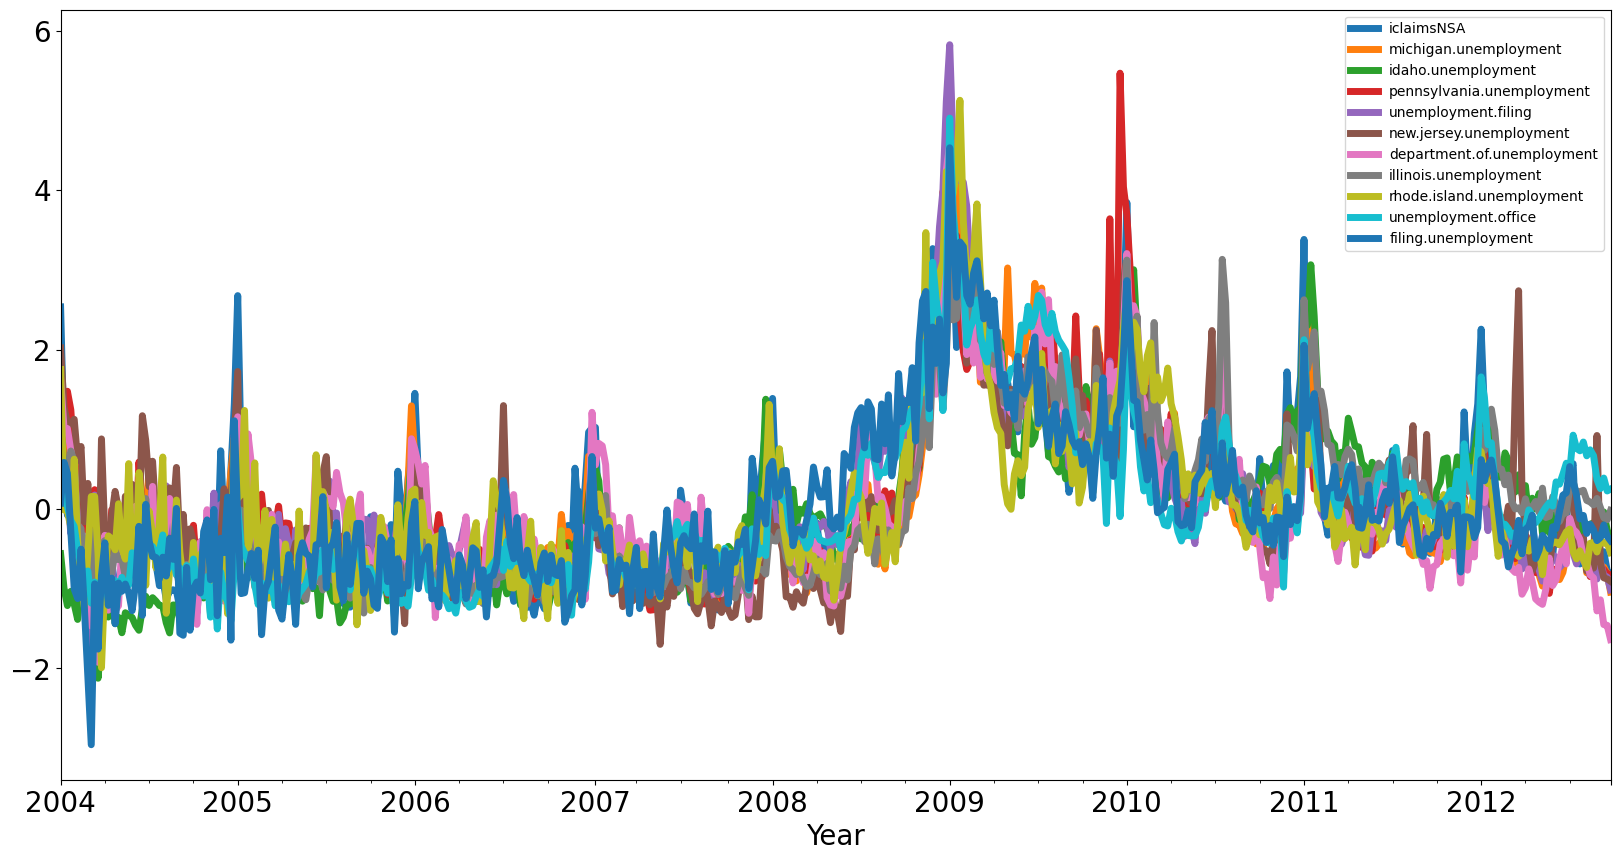

In [7]:
carac_data.plot_st()

In [8]:
# test de stationarity for the times series michigan
michigan = data['michigan.unemployment']
test_st = tools_st.Test_times_series_stationary(michigan)
#test adf
test_st.adf_test()
#test kpss
test_st.kpss_test()


Results of Dickey-Fuller Test, with :
Null Hypothesis (HO): The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.
Alternate Hypothesis(HA): Series is stationary .
Test Statistic                  -3.305817
p-value                          0.014620
#Lags Used                       2.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64
The time series is stationary
Results of KPSS Test, with :
Null Hypothesis (HO): Series is trend stationary or series has no unit root.
Alternate Hypothesis(HA): Series is non-stationary or series has a unit root.
Test Statistic            0.614852
p-value                   0.021286
#Lags Used               12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)    

Interpretation of tests :
1. Both tests conclude that the given series is stationary 
– The series is stationary
2. Both tests conclude that the given series is non-stationary
– The series is non-stationary
3. **ADF concludes non-stationary and KPSS concludes stationary**
– The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.
4. **ADF concludes stationary and KPSS concludes non-stationary**
– The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity

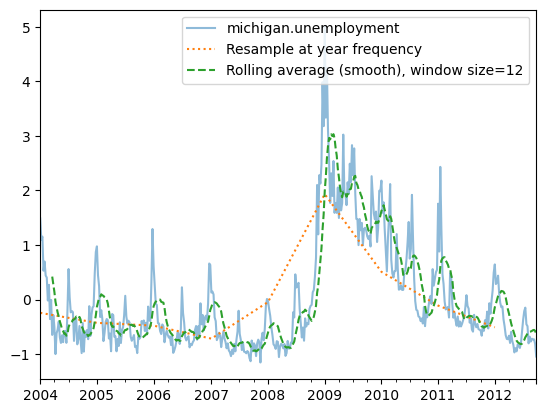

In [9]:
#Visualisation of trends in the times series by using 
#Resampling, smoothing, windowing, rolling average
carac_data.plot_smoothing('michigan.unemployment', 'A',12)

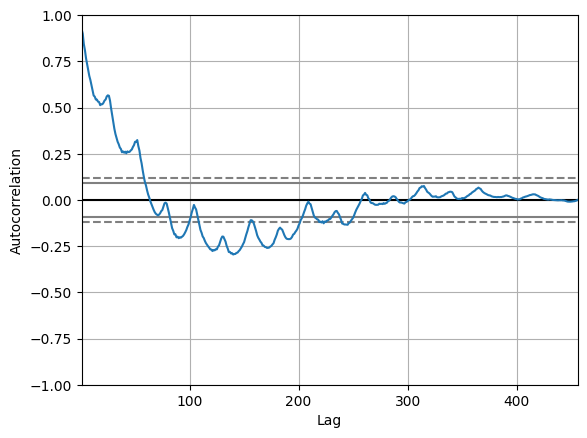

In [11]:
opp = tools_st.Operation_on_ts(data)
opp.acf(michigan)

In [12]:
# dtrend data and after test la stationarity
list_times_series = ["idaho.unemployment", "michigan.unemployment", "pennsylvania.unemployment",
                  "unemployment.filing"]
data_trend = opp.dtrend_times_series(list_times_series)

Text(0.5, 0, 'Year')

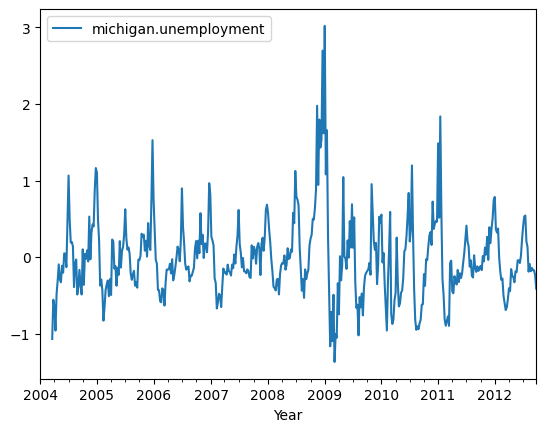

In [13]:
data_trend[["michigan.unemployment"]].plot()
plt.xlabel('Year')

In [14]:
michigan_dtrend = data_trend["michigan.unemployment"]
michigan_dtrend.dropna(inplace=True)
test_st = tools_st.Test_times_series_stationary(michigan_dtrend)
test_st.adf_test(alpha = 0.05, auto_lag = 'AIC')
test_st.kpss_test()


Results of Dickey-Fuller Test, with :
Null Hypothesis (HO): The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.
Alternate Hypothesis(HA): Series is stationary .
Test Statistic                -7.694698e+00
p-value                        1.389281e-11
#Lags Used                     1.000000e+01
Number of Observations Used    4.340000e+02
Critical Value (1%)           -3.445508e+00
Critical Value (5%)           -2.868223e+00
Critical Value (10%)          -2.570330e+00
dtype: float64
The time series is stationary
Results of KPSS Test, with :
Null Hypothesis (HO): Series is trend stationary or series has no unit root.
Alternate Hypothesis(HA): Series is non-stationary or series has a unit root.
Test Statistic            0.062726
p-value                   0.100000
#Lags Used               11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical 

/home/rzreik/works_2023/temporelle_series/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


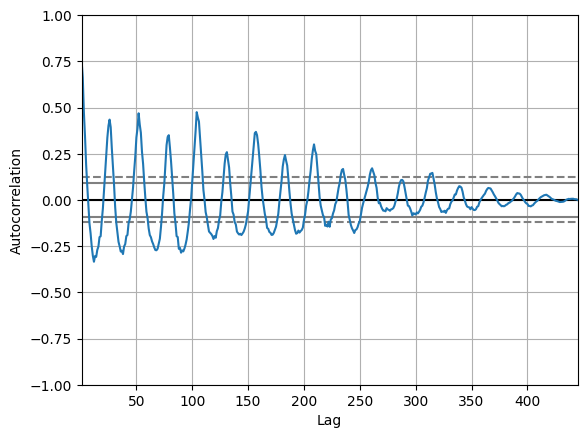

In [15]:
opp.acf(michigan_dtrend)